# Expirementation of training of a Tabular Q Player with itself and Evaluation with a Random Player and a MinMax Player.

Note first that the following result are for the Tabluar Q Player (TQ Player), with initial q values of 0.6. One can have differents results by varying the initial q value (see https://github.com/fcarsten/tic-tac-toe/blob/master/tic_tac_toe/TabularQPlayer.py )or change on the directory file if you have cloned the repository.

## 1. Initialization

### 1.1. Importation of modules and functions

We start by import all important modules and functions that we can find in the link https://github.com/fcarsten/tic-tac-toe/tree/master/tic_tac_toe 

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from tic_tac_toe.Board import Board, GameResult, CROSS, NAUGHT, EMPTY
from tic_tac_toe.Player import Player
from tic_tac_toe.RandomPlayer import RandomPlayer
from tic_tac_toe.MinMaxAgent import MinMaxAgent
from tic_tac_toe.RndMinMaxAgent import RndMinMaxAgent
from tic_tac_toe.TabularQPlayer import TQPlayer

from tic_tac_toe.Board import Board, GameResult, CROSS, NAUGHT, EMPTY
from util import battle

### 1.2. Training and Evaluation

We want the agent to be trained by playing with itself and be evluated with other players

For that we need to have a training function and a evaluation  function. But kill two birds with one stone we can just modify the function play_game of the file util.py such then after playing a game, the agent doesn't update its value if that was just for evaluation (see the last 'if' condition).

### 1.2. Creation of the function eval_player

This function will allow us to do a certain number of battles between two players (each battle has a certain number of games, 100 defaultly ), and for each battle the function output in percenetage the ratio of victory of each player and the ratio of draw according to the number of games. And output everything as a plot.

In [11]:
def eval_players(p1 : Player, p2 : Player, num_battles : int, games_per_battle = 100, loc='best'):
    p1_wins = []
    p2_wins = []
    draws = []
    count = []    

    for i in range(num_battles):
        p1win, p2win, draw = battle(p1, p2, games_per_battle, True)
        p1_wins.append(p1win*100.0/games_per_battle)
        p2_wins.append(p2win*100.0/games_per_battle)
        draws.append(draw*100.0/games_per_battle)
        count.append(i*games_per_battle)
        p1_wins.append(p1win*100.0/games_per_battle)
        p2_wins.append(p2win*100.0/games_per_battle)
        draws.append(draw*100.0/games_per_battle)
        count.append((i+1)*games_per_battle)

    plt.ylabel('Game outcomes in %')
    plt.xlabel('Game number')

    plt.plot(count, draws, 'r-', label='Draw')
    plt.plot(count, p1_wins, 'g-', label='Player 1 wins')
    plt.plot(count, p2_wins, 'b-', label='Player 2 wins')
    plt.legend(loc=loc, shadow=True, fancybox=True, framealpha =0.7)

## 2. Check if the player is improving by playing with other players

### 2.1. Tabular Q Player is going last

In [ ]:
player1 = RandomPlayer()
player2 = TQPlayer()
eval_players(player1, player2, 100)

So we see that the TQ Player is not improving its strategy! So it is just evaluating.

### 2.2. Tabular Q Player is going first

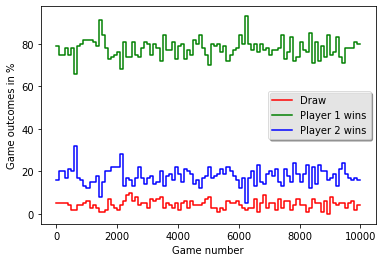

In [20]:
player1 = TQPlayer()
player2 = RandomPlayer()
eval_players(player1, player2, 100)

Still the same

### 3.1. With the Minimax

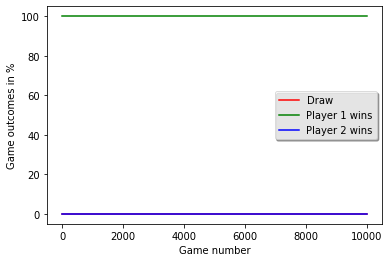

In [10]:
player1 = MinMaxAgent()
player2 = TQPlayer()
eval_players(player1, player2, 100)

Even after 10000 games the minimax is winning 100% of time! So that's good the learner is just evaluating

### 3.2. The Tabular Q Player is going first

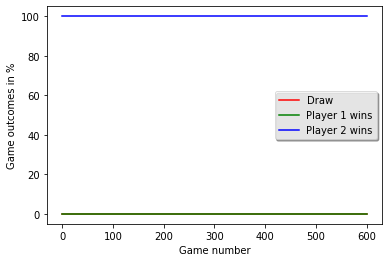

In [11]:
player1 = TQPlayer()
player2 = MinMaxAgent()
eval_players(player1, player2, 6)

The same situation as above.

## 4. Check if the training will occur when playing with itself

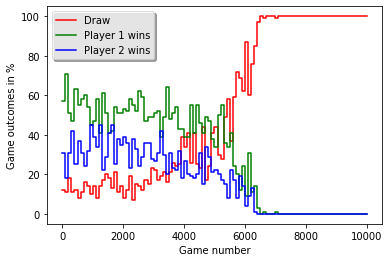

In [12]:
player1 = TQPlayer()
player2 = TQPlayer()
eval_players(player1, player2, 100)

Now it is playing with itself the TQ Playing perform training, not an evaluation.

### Let see how the TQ Player will play with the Minmax and the Random Player after get trained with itself

### 5.1 With the Minmax

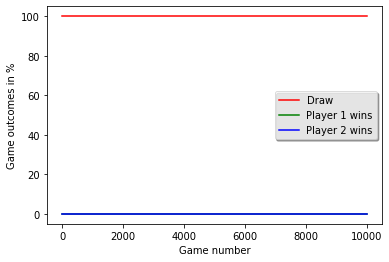

In [13]:
player1 = MinMaxAgent()
eval_players(player1, player2, 100)

100% of draw. That actually good.

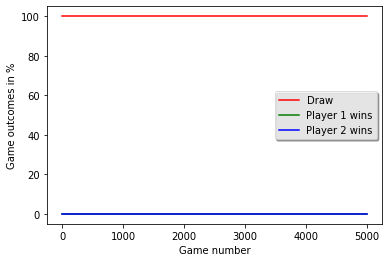

In [14]:
player1 = RndMinMaxAgent()
eval_players(player1, player2, 50)

Even with the Random Minmax, 100% draw.

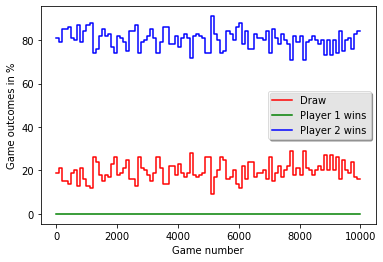

In [15]:
player1 = RandomPlayer()
eval_players(player1, player2, 100)

As we have said in the previous notebook, after training with itself it was being able to play optimally against the two Minimax Players and never get loss even with the random payer.

But he wasn't able to find a strategy of beating the Random player 100% times.